In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Uploading first dataset

In [2]:
sales_train_df = pd.read_csv('../input/rossmann-store-sales/train.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_train_df['Promo'].unique()

array([1, 0])

In [5]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [6]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [7]:
sales_train_df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [8]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### UPLOADING STORE DATASET

In [10]:
store_df = pd.read_csv('../input/rossmann-store-sales/store.csv')

In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### EDA - SALES

In [14]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

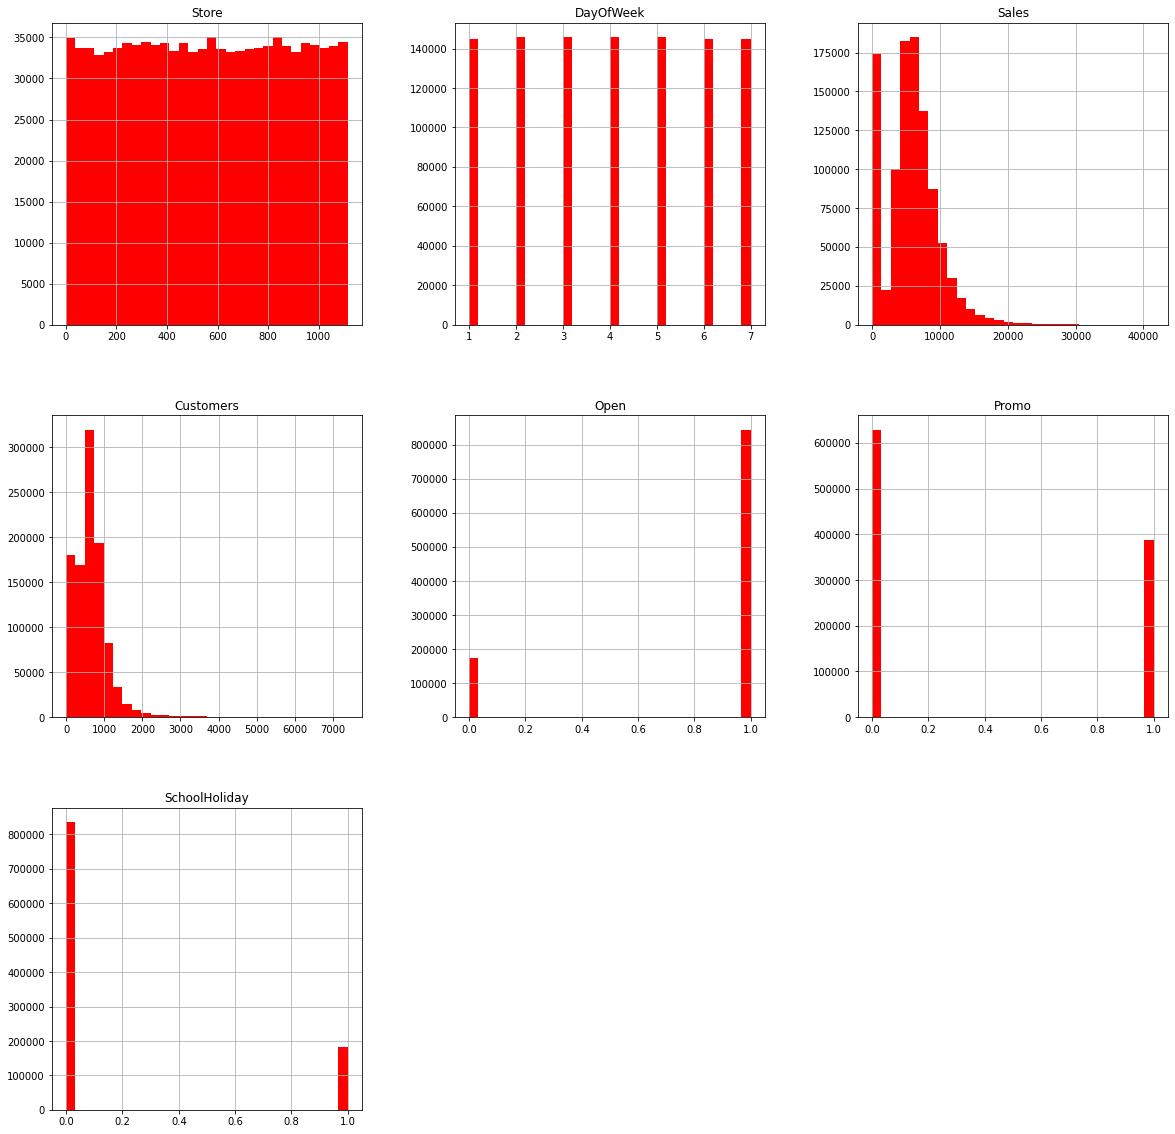

In [15]:
sales_train_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [16]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [17]:
print('Total = ', len(sales_train_df))
print('Number of shops/days OPEN = ', len(open_train_df))
print('Number of shops/days CLOSED = ', len(closed_train_df))

Total =  1017209
Number of shops/days OPEN =  844392
Number of shops/days CLOSED =  172817


In [18]:
172817/ len(store_df)

154.99282511210762

In [19]:
# shops were closed for 155 days in the period of 2 years

In [20]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [21]:
sales_train_df.drop(['Open'], axis = 1, inplace = True)

In [22]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### EDA - STORES

<AxesSubplot:>

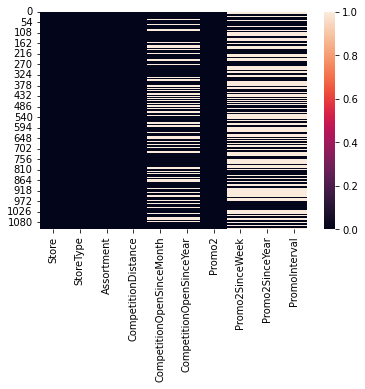

In [23]:
sns.heatmap(store_df.isnull())

In [24]:
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [25]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [26]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
store_df[store_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_df[str].fillna(0, inplace = True)

In [29]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)

<AxesSubplot:>

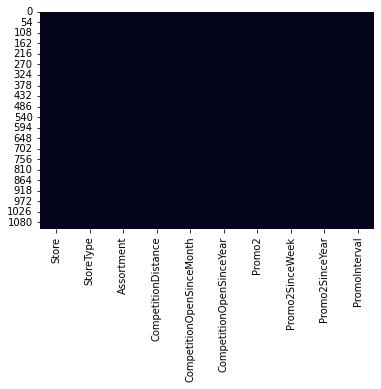

In [30]:
sns.heatmap(store_df.isnull(), cbar = False)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

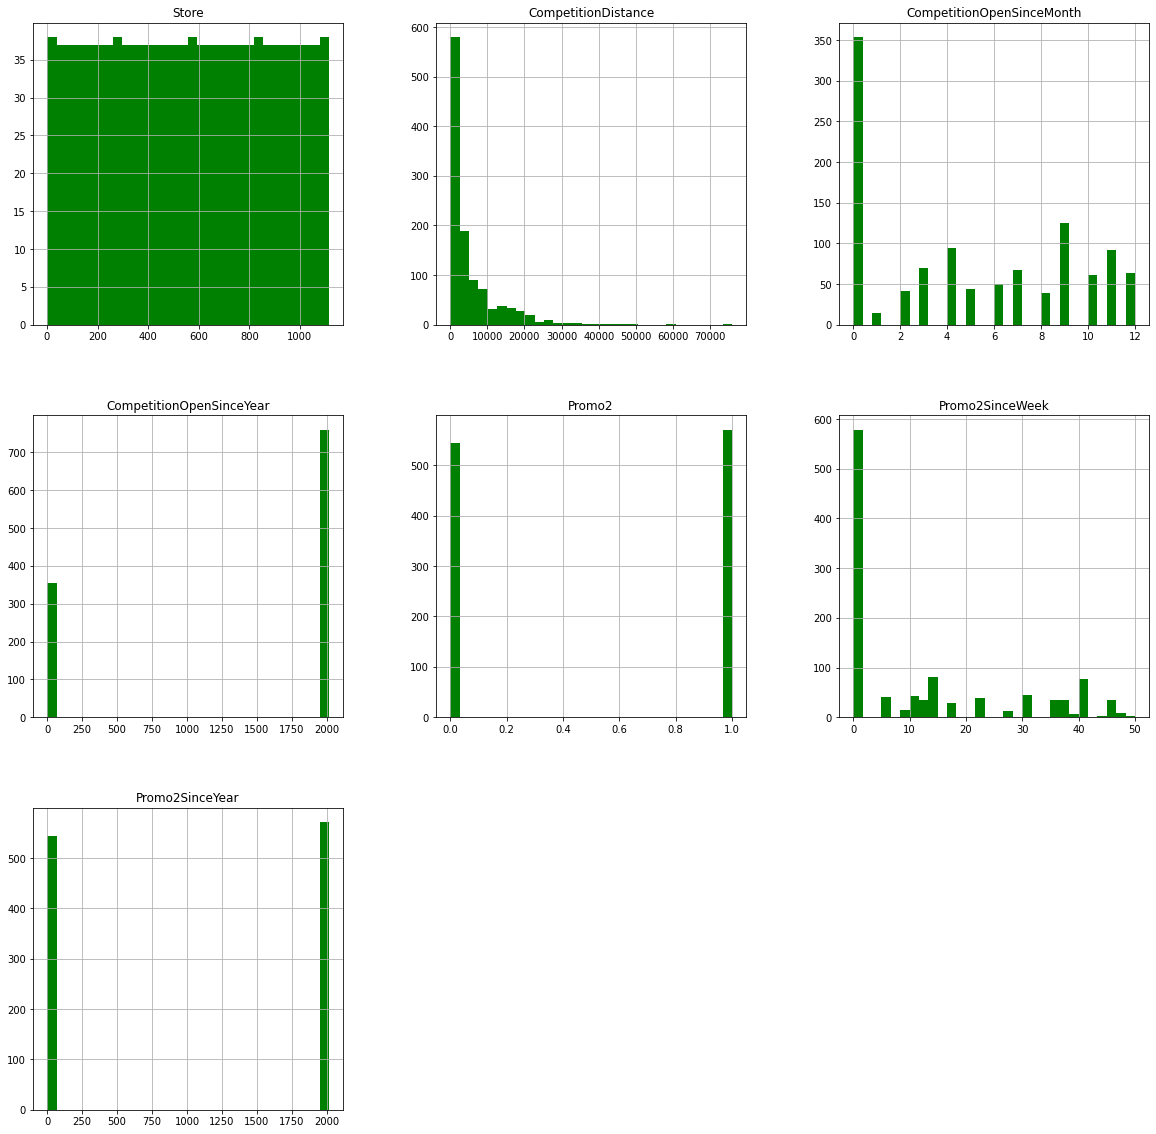

In [31]:
store_df.hist(bins = 30, figsize=(20,20), color='g')

### MERGING SALES+STORE

In [32]:
sales_train_all = pd.merge(sales_train_df, store_df, how = 'inner', on = 'Store')

In [33]:
sales_train_all.shape

(844392, 17)

In [34]:
sales_train_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


<AxesSubplot:>

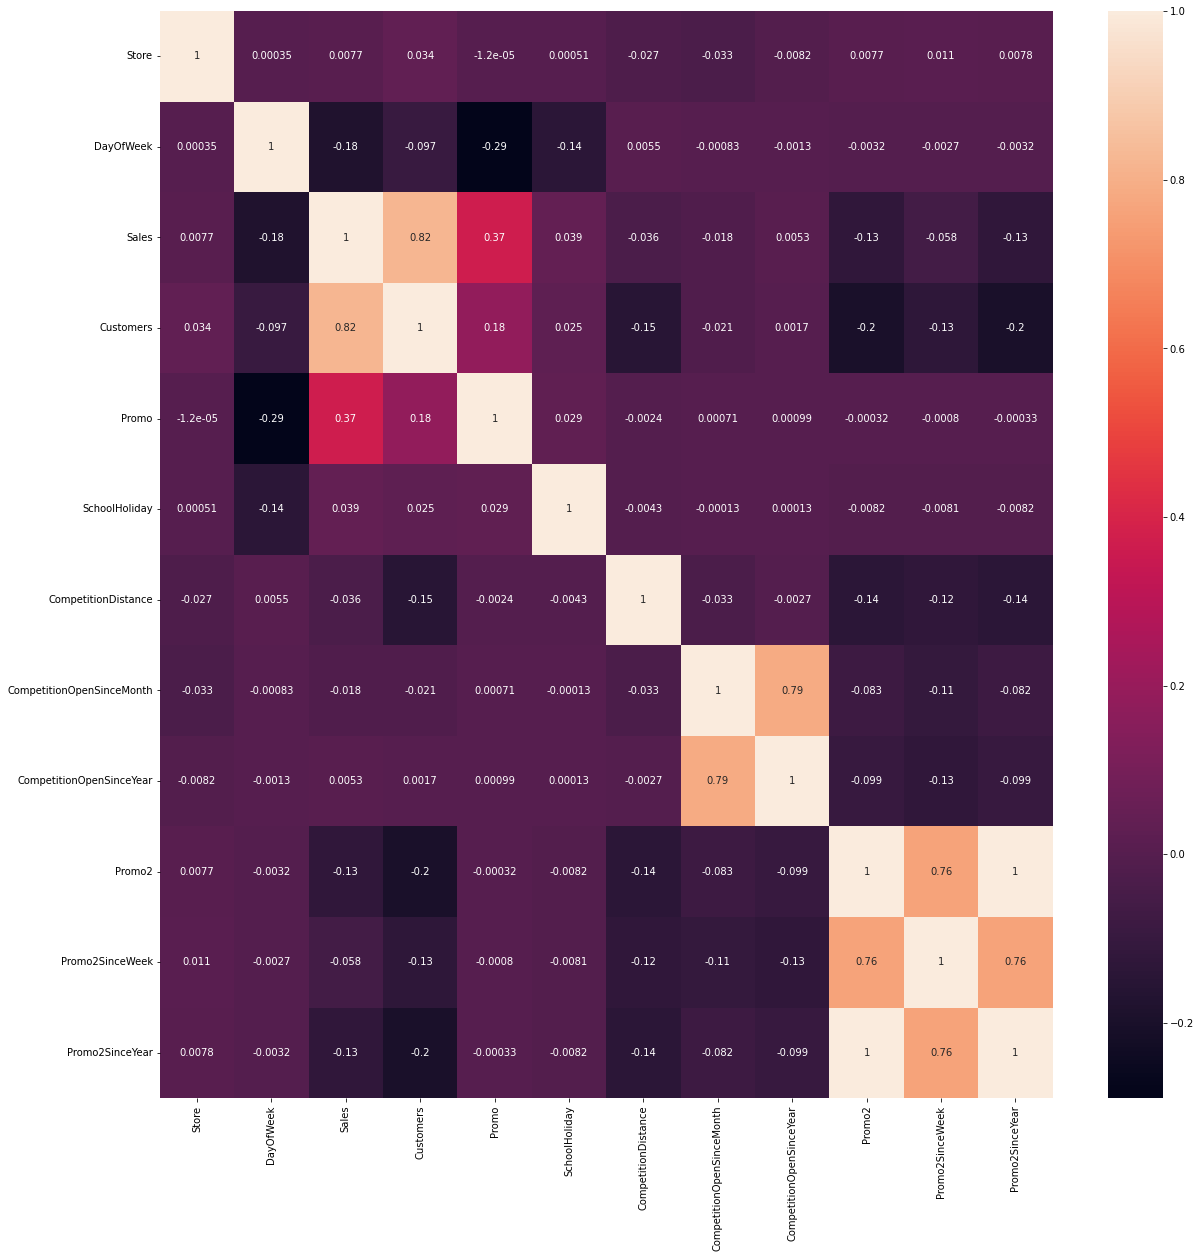

In [35]:
correlations = sales_train_all.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)

In [36]:
correlations = sales_train_all.corr()['Sales'].sort_values(ascending=False)
correlations

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

In [37]:
sales_train_all['Day'] = pd.DatetimeIndex(sales_train_all['Date']).day
sales_train_all['Month'] = pd.DatetimeIndex(sales_train_all['Date']).month
sales_train_all['Year'] = pd.DatetimeIndex(sales_train_all['Date']).year

In [38]:
sales_train_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,30,7,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,29,7,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,28,7,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,27,7,2015


Text(0.5, 1.0, 'Average SALES per MONTH')

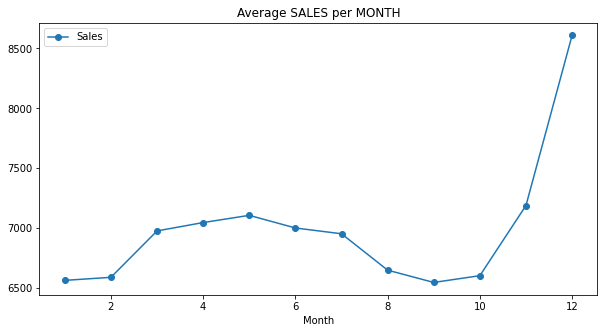

In [39]:
axis = sales_train_all.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average SALES per MONTH')

Text(0.5, 1.0, 'Average CUSTOMERS per MONTH')

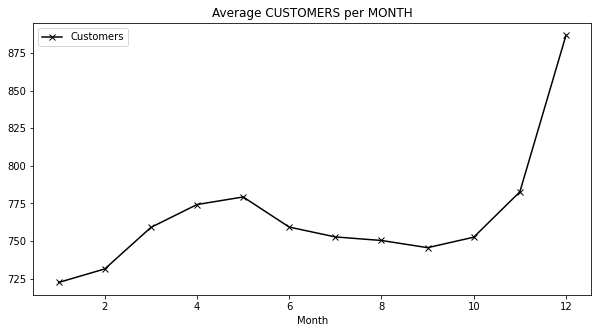

In [40]:
axis = sales_train_all.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker = 'x', color = 'black')
axis.set_title('Average CUSTOMERS per MONTH')

Text(0.5, 1.0, 'Average SALES per DAY')

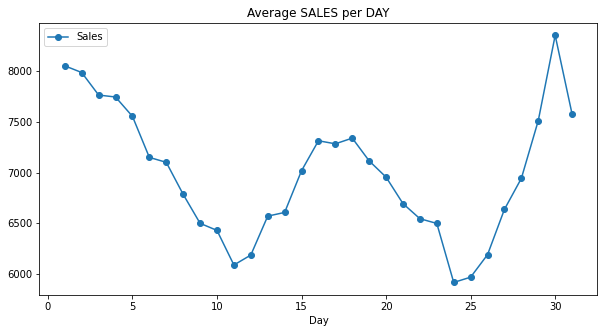

In [41]:
axis = sales_train_all.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average SALES per DAY')

Text(0.5, 1.0, 'Average CUSTOMERS per DAY')

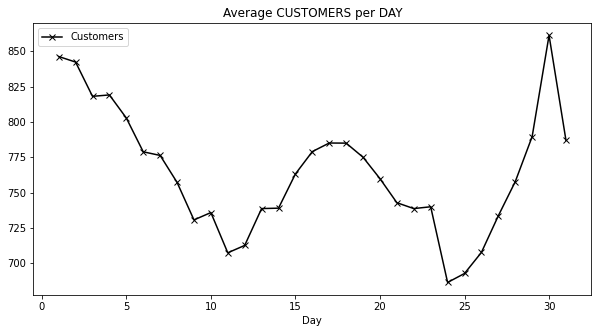

In [42]:
axis = sales_train_all.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker = 'x', color = 'black')
axis.set_title('Average CUSTOMERS per DAY')

Text(0.5, 1.0, 'Average SALES per WEEK DAY')

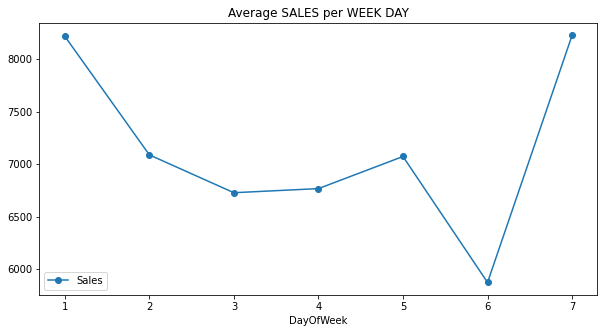

In [43]:
axis = sales_train_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average SALES per WEEK DAY')

Text(0.5, 1.0, 'Average CUSTOMERS per WEEK DAY')

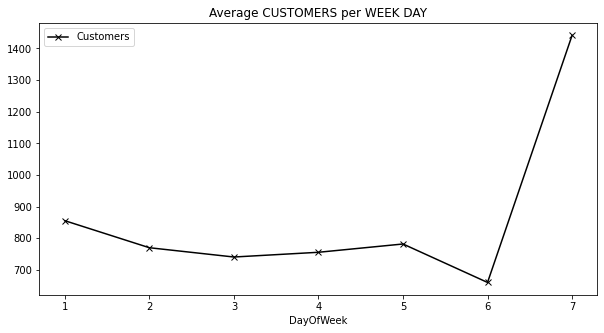

In [44]:
axis = sales_train_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker = 'x', color = 'black')
axis.set_title('Average CUSTOMERS per WEEK DAY')

<AxesSubplot:xlabel='Date'>

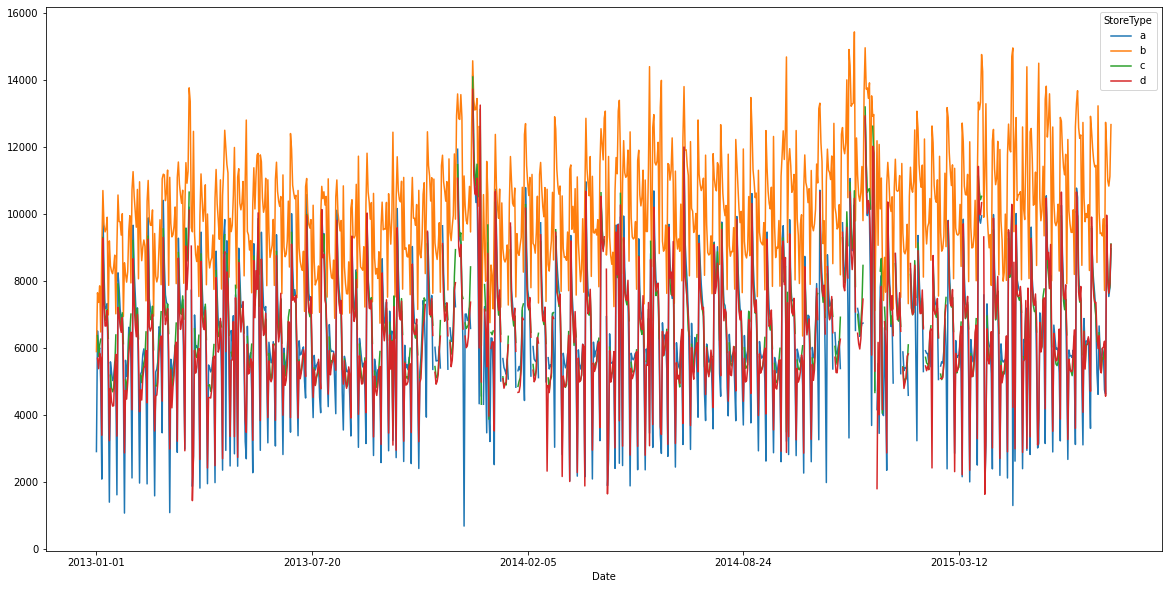

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

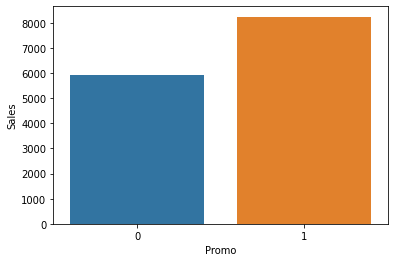

In [46]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

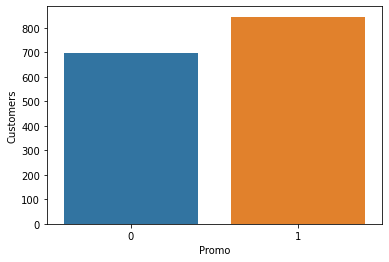

In [47]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all)

### TRAINING MODEL (Facebook Phophet)

In [48]:
from fbprophet import Prophet

In [49]:
# Date: ds - fbphopet pattern
# Sales: y - fbphopet pattern
def sales_predict(store_id, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values(by = 'ds')
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    
    return sales_df, forecast
    

Initial log joint probability = -8.16708
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1530.15   0.000186718       99.5645           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       1530.38   0.000314325       64.9113   4.086e-06       0.001      191  LS failed, Hessian reset 
     199       1530.44   3.52209e-06       79.1188      0.5232      0.5232      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       1530.44   2.92464e-05       103.689   3.675e-07       0.001      381  LS failed, Hessian reset 
     299       1530.44   4.27274e-07       75.1257      0.5596      0.5596      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       1530.44   6.51244e-08       90.3728      0.2012           1      477   
Optimization terminat

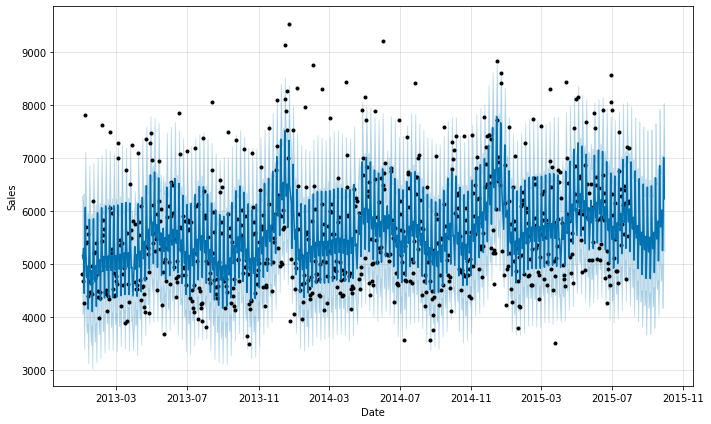

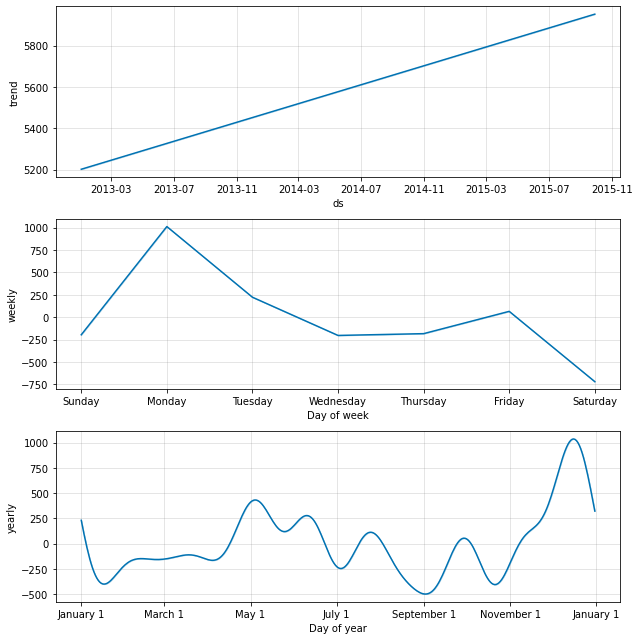

In [50]:
df_original, df_prediction = sales_predict(10, sales_train_all, 60)

In [51]:
df_original.shape, df_prediction.shape

((784, 2), (844, 19))

In [52]:
df_prediction.tail(60) #Sales prediction for the next 60 days.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5907.667918,4215.670219,6205.950923,5907.667918,5907.667918,-674.299007,-674.299007,-674.299007,-719.402897,-719.402897,-719.402897,45.103890,45.103890,45.103890,0.0,0.0,0.0,5233.368911
785,2015-08-02,5908.418466,4716.388468,6775.529692,5908.418466,5908.418466,-171.102250,-171.102250,-171.102250,-195.888483,-195.888483,-195.888483,24.786233,24.786233,24.786233,0.0,0.0,0.0,5737.316216
786,2015-08-03,5909.169014,5810.839978,7957.438705,5909.169014,5909.169014,1015.475636,1015.475636,1015.475636,1012.767292,1012.767292,1012.767292,2.708344,2.708344,2.708344,0.0,0.0,0.0,6924.644651
787,2015-08-04,5909.919562,5024.575916,7128.104271,5909.919562,5909.919562,202.683695,202.683695,202.683695,223.453705,223.453705,223.453705,-20.770010,-20.770010,-20.770010,0.0,0.0,0.0,6112.603258
788,2015-08-05,5910.670111,4589.329555,6621.756932,5910.670111,5910.670111,-248.621274,-248.621274,-248.621274,-203.329041,-203.329041,-203.329041,-45.292233,-45.292233,-45.292233,0.0,0.0,0.0,5662.048837
789,2015-08-06,5911.420659,4552.298754,6711.877962,5911.420659,5911.420659,-253.831473,-253.831473,-253.831473,-183.317792,-183.317792,-183.317792,-70.513681,-70.513681,-70.513681,0.0,0.0,0.0,5657.589186
790,2015-08-07,5912.171207,4902.653405,6975.910101,5912.171207,5912.171207,-30.392288,-30.392288,-30.392288,65.717217,65.717217,65.717217,-96.109505,-96.109505,-96.109505,0.0,0.0,0.0,5881.778918
791,2015-08-08,5912.921755,4010.984750,6140.722665,5912.921755,5912.921755,-841.184284,-841.184284,-841.184284,-719.402897,-719.402897,-719.402897,-121.781387,-121.781387,-121.781387,0.0,0.0,0.0,5071.737471
792,2015-08-09,5913.672303,4514.964925,6622.645541,5913.672303,5913.672304,-343.151443,-343.151443,-343.151443,-195.888483,-195.888483,-195.888483,-147.262960,-147.262960,-147.262960,0.0,0.0,0.0,5570.520860
793,2015-08-10,5914.422851,5728.990752,7767.348093,5914.422851,5914.422852,840.443469,840.443469,840.443469,1012.767292,1012.767292,1012.767292,-172.323824,-172.323824,-172.323824,0.0,0.0,0.0,6754.866320


### TRAINING MODEL 2 -> COUNTING HOLIDAYS

In [53]:
def sales_predict(store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values(by = 'ds')
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    
    return sales_df, forecast
    

In [54]:
school_holidays = sales_train_all[sales_train_all['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [55]:
state_holidays = sales_train_all[(sales_train_all['StateHoliday'] == 'a') |
                                (sales_train_all['StateHoliday'] == 'b') |
                                 (sales_train_all['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [56]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                              'holiday': 'state_holiday'})

In [57]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                              'holiday': 'school_holiday'})

In [58]:
holidays_true = pd.concat((state_holidays, school_holidays))

### Sales prediction for Store id 10 for for the next 14 days.

Initial log joint probability = -8.16708
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1535.81   0.000217897       115.633           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1535.88   0.000225946       87.7254   1.848e-06       0.001      185  LS failed, Hessian reset 
     199       1535.95   1.26121e-06       102.112           1           1      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1535.95   3.98702e-08        98.114      0.7758      0.7758      276   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


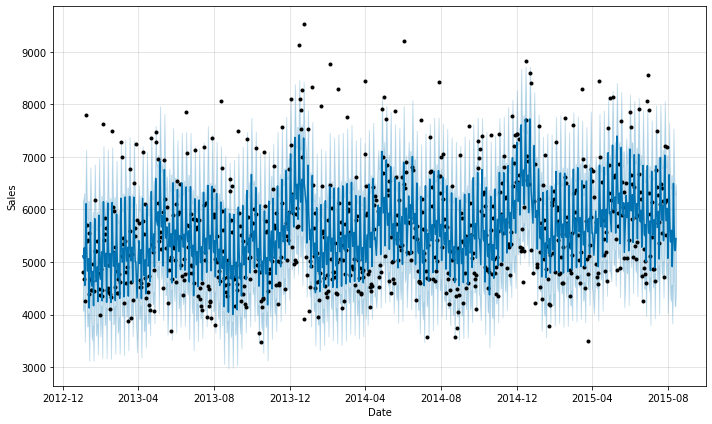

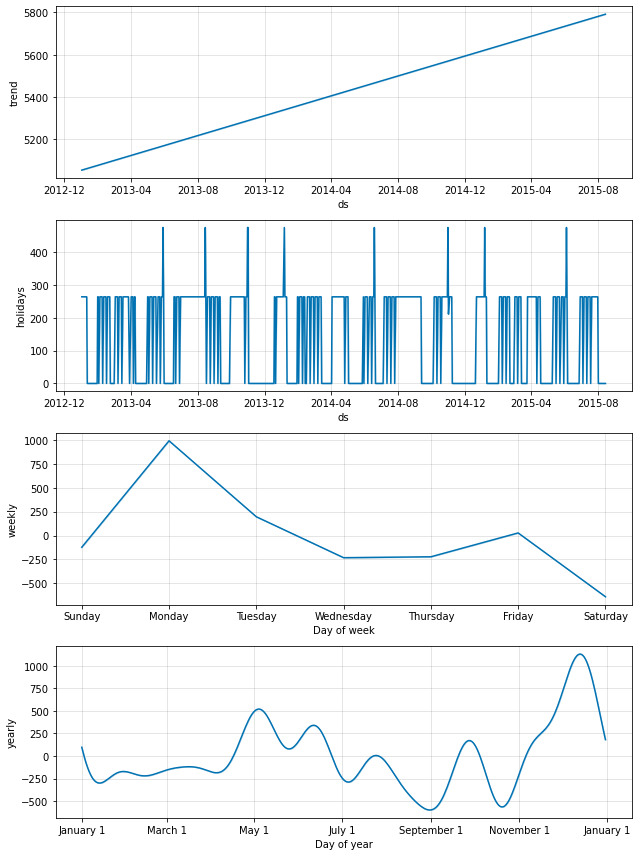

In [59]:
df_original, df_predict = sales_predict(10, sales_train_all, holidays_true, 14)

In [62]:
prediction_df = df_original[['ds', 'y']].rename(columns = {'ds': 'Date', 'y':'Sales'}).tail(14)

In [64]:
#Final DF with the prediction
prediction_df

,Date,Sales
7049,2015-07-16,6275
7048,2015-07-17,5356
7047,2015-07-18,5761
7046,2015-07-20,6111
7045,2015-07-21,6479
7044,2015-07-22,5561
7043,2015-07-23,6401
7042,2015-07-24,6152
7041,2015-07-25,4713
7040,2015-07-27,7212
